In [2]:
import numpy as np
import pandas as pd
import scipy.io as scio
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import Callback,ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten, Dropout
from sklearn.model_selection import StratifiedKFold
from keras.utils import to_categorical
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split

import seaborn as sns

# Part A

In [3]:
mat = scio.loadmat('data/97.mat')
variables = scio.whosmat('data/97.mat')
# print(variables)

# Choose the appropriate key for your data based on the output of the previous step
data1 = mat['X097_DE_time']
data2 = mat['X097_FE_time']
# Convert the data to a DataFrame
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
normal=[]
for i in range(200):
    a=np.concatenate([df1.values[i*400:400+i*400], df2.values[i*400:400+i*400]],axis=1)
    normal.append(a)

normal=np.squeeze(normal)

In [4]:
mat = scio.loadmat('data/105.mat')
variables = scio.whosmat('data/105.mat')
# print(variables)

# Choose the appropriate key for your data based on the output of the previous step
data1 = mat['X105_DE_time']
data2 = mat['X105_FE_time']
# Convert the data to a DataFrame
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
f105=[]
temp=[]
for i in range(200):
    a=np.concatenate([df1.values[i*400:400+i*400], df2.values[i*400:400+i*400]],axis=1)
    f105.append(a)

f105=np.squeeze(f105)

In [5]:
mat = scio.loadmat('data/118.mat')
variables = scio.whosmat('data/118.mat')
# print(variables)

# Choose the appropriate key for your data based on the output of the previous step
data1 = mat['X118_DE_time']
data2 = mat['X118_FE_time']
# Convert the data to a DataFrame
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
f118=[]
temp=[]
for i in range(200):
    a=np.concatenate([df1.values[i*400:400+i*400], df2.values[i*400:400+i*400]],axis=1)
    f118.append(a)

f118=np.squeeze(f118)

In [6]:
mat = scio.loadmat('data/130.mat')
variables = scio.whosmat('data/130.mat')
# print(variables)

# Choose the appropriate key for your data based on the output of the previous step
data1 = mat['X130_DE_time']
data2 = mat['X130_FE_time']
# Convert the data to a DataFrame
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
f130=[]
temp=[]
for i in range(200):
    a=np.concatenate([df1.values[i*400:400+i*400], df2.values[i*400:400+i*400]],axis=1)
    f130.append(a)

f130=np.squeeze(f130)

In [7]:
mat = scio.loadmat('data/144.mat')
variables = scio.whosmat('data/144.mat')
# print(variables)

# Choose the appropriate key for your data based on the output of the previous step
data1 = mat['X144_DE_time']
data2 = mat['X144_FE_time']
# Convert the data to a DataFrame
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
f144=[]
temp=[]
for i in range(200):
    a=np.concatenate([df1.values[i*400:400+i*400], df2.values[i*400:400+i*400]],axis=1)
    f144.append(a)

f144=np.squeeze(f144)

In [8]:
mat = scio.loadmat('data/156.mat')
variables = scio.whosmat('data/156.mat')
# print(variables)

# Choose the appropriate key for your data based on the output of the previous step
data1 = mat['X156_DE_time']
data2 = mat['X156_FE_time']
# Convert the data to a DataFrame
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
f156=[]
temp=[]
for i in range(200):
    a=np.concatenate([df1.values[i*400:400+i*400], df2.values[i*400:400+i*400]],axis=1)
    f156.append(a)

f156=np.squeeze(f156)

In [9]:
std_normal= normal.std(axis=1)
peak_normal= normal.max(axis=1)
from scipy.stats import skew, kurtosis
skewness_normal= skew(normal, axis=1)
kurtosis_normal= kurtosis(normal, axis=1)
crest_factor_normal = np.max(normal, axis=1) / np.sqrt(np.mean(normal**2, axis=1))
ptp_normal= np.ptp(normal, axis=1)
mean_normal= np.mean(normal, axis=1)
rms_normal = np.sqrt(np.mean(normal**2, axis=1))
abs_mean_normal= np.mean(np.abs(normal), axis=1)
nor_fft_rms=np.sqrt(np.mean((np.fft.fft(normal))**2, axis=1))
feature_normal=np.concatenate([std_normal, peak_normal, skewness_normal, kurtosis_normal, crest_factor_normal, ptp_normal, mean_normal, rms_normal, abs_mean_normal,nor_fft_rms],axis=1)

In [10]:
std_f105= f105.std(axis=1)
peak_f105= f105.max(axis=1)
from scipy.stats import skew, kurtosis
skewness_f105= skew(f105, axis=1)
kurtosis_f105= kurtosis(f105, axis=1)
crest_factor_f105 = np.max(f105, axis=1) / np.sqrt(np.mean(f105**2, axis=1))
ptp_f105= np.ptp(f105, axis=1)
mean_f105= np.mean(f105, axis=1)
rms_f105 = np.sqrt(np.mean(f105**2, axis=1))
abs_mean_f105= np.mean(np.abs(f105), axis=1)
f105_fft_rms=np.sqrt(np.mean((np.fft.fft(f105))**2, axis=1))
feature_f105=np.concatenate([std_f105, peak_f105, skewness_f105, kurtosis_f105, crest_factor_f105, ptp_f105, mean_f105, rms_f105, abs_mean_f105,f105_fft_rms],axis=1)


In [11]:
std_f118= f118.std(axis=1)
peak_f118= f118.max(axis=1)
from scipy.stats import skew, kurtosis
skewness_f118= skew(f118, axis=1)
kurtosis_f118= kurtosis(f118, axis=1)
crest_factor_f118 = np.max(f118, axis=1) / np.sqrt(np.mean(f118**2, axis=1))
ptp_f118= np.ptp(f118, axis=1)
mean_f118= np.mean(f118, axis=1)
rms_f118 = np.sqrt(np.mean(f118**2, axis=1))
abs_mean_f118= np.mean(np.abs(f118), axis=1)
f118_fft_rms=np.sqrt(np.mean((np.fft.fft(f118))**2, axis=1))
feature_f118=np.concatenate([std_f118, peak_f118, skewness_f118, kurtosis_f118, crest_factor_f118, ptp_f118, mean_f118, rms_f118, abs_mean_f118,f118_fft_rms],axis=1)


In [12]:
std_f130= f130.std(axis=1)
peak_f130= f130.max(axis=1)
from scipy.stats import skew, kurtosis
skewness_f130= skew(f130, axis=1)
kurtosis_f130= kurtosis(f130, axis=1)
crest_factor_f130 = np.max(f130, axis=1) / np.sqrt(np.mean(f130**2, axis=1))
ptp_f130= np.ptp(f130, axis=1)
mean_f130= np.mean(f130, axis=1)
rms_f130 = np.sqrt(np.mean(f130**2, axis=1))
abs_mean_f130= np.mean(np.abs(f130), axis=1)
f130_fft_rms=np.sqrt(np.mean((np.fft.fft(f130))**2, axis=1))
feature_f130=np.concatenate([std_f130, peak_f130, skewness_f130, kurtosis_f130, crest_factor_f130, ptp_f130, mean_f130, rms_f130, abs_mean_f130,f130_fft_rms],axis=1)


In [13]:
std_f144= f144.std(axis=1)
peak_f144= f144.max(axis=1)
from scipy.stats import skew, kurtosis
skewness_f144= skew(f144, axis=1)
kurtosis_f144= kurtosis(f144, axis=1)
crest_factor_f144 = np.max(f144, axis=1) / np.sqrt(np.mean(f144**2, axis=1))
ptp_f144= np.ptp(f144, axis=1)
mean_f144= np.mean(f144, axis=1)
rms_f144 = np.sqrt(np.mean(f144**2, axis=1))
abs_mean_f144= np.mean(np.abs(f144), axis=1)
f144_fft_rms=np.sqrt(np.mean((np.fft.fft(f144))**2, axis=1))
feature_f144=np.concatenate([std_f144, peak_f144, skewness_f144, kurtosis_f144, crest_factor_f144, ptp_f144, mean_f144, rms_f144, abs_mean_f144,f144_fft_rms],axis=1)


In [14]:
std_f156= f156.std(axis=1)
peak_f156= f156.max(axis=1)
from scipy.stats import skew, kurtosis
skewness_f156= skew(f156, axis=1)
kurtosis_f156= kurtosis(f156, axis=1)
crest_factor_f156 = np.max(f156, axis=1) / np.sqrt(np.mean(f156**2, axis=1))
ptp_f156= np.ptp(f156, axis=1)
mean_f156= np.mean(f156, axis=1)
rms_f156 = np.sqrt(np.mean(f156**2, axis=1))
abs_mean_f156= np.mean(np.abs(f156), axis=1)
f156_fft_rms=np.sqrt(np.mean((np.fft.fft(f156))**2, axis=1))
feature_f156=np.concatenate([std_f156, peak_f156, skewness_f156, kurtosis_f156, crest_factor_f156, ptp_f156, mean_f156, rms_f156, abs_mean_f156,f156_fft_rms],axis=1)


In [15]:
X=np.concatenate([feature_normal, feature_f105, feature_f118, feature_f130, feature_f144, feature_f156])
y = np.concatenate((np.zeros(len(feature_normal)), np.ones(len(feature_f105)), 2*np.ones(len(feature_f118)), 3*np.ones(len(feature_f130)),4*np.ones(len(feature_f144)),5*np.ones(len(feature_f156))))

# MLP

In [16]:
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten, Dropout
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

input_shape=x_train[0].shape

num_classes = 6

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
import keras
opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 5,894
Trainable params: 5,894
Non-trainable params: 0
_________________________________________________________________


In [17]:
history= model.fit(x_train, y_train , batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
30/30 [==============================] - 0s 6ms/step - loss: 1.5709 - accuracy: 0.4083 - val_loss: 1.2409 - val_accuracy: 0.6833
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.9641 - accuracy: 0.8083 - val_loss: 0.7414 - val_accuracy: 0.8000
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.8323 - val_loss: 0.4809 - val_accuracy: 0.9417
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.8510 - val_loss: 0.3808 - val_accuracy: 0.8083
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.9042 - val_loss: 0.3003 - val_accuracy: 0.9292
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.2637 - accuracy: 0.9646 - val_loss: 0.2422 - val_accuracy: 0.9542
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.2200 - accuracy: 0.9708 - val_loss: 0.1932 - val_accuracy: 0.9792
Epoch 8/100
3

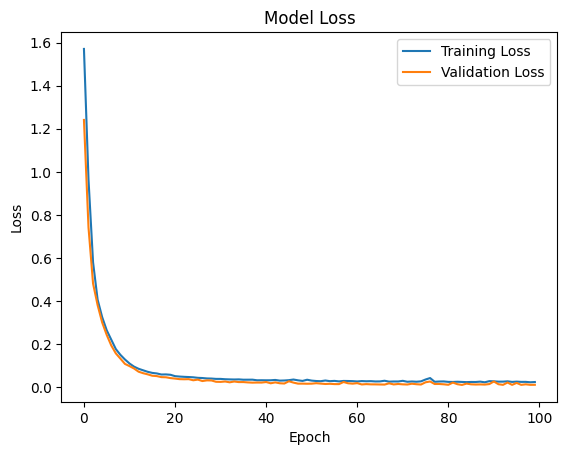

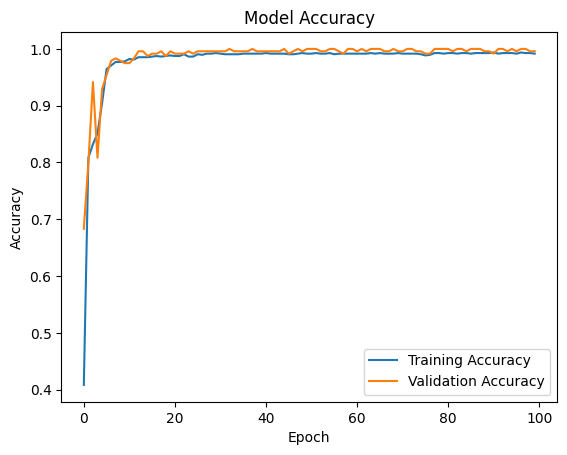

2/2 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 0.9958
Test loss: 0.010522214695811272
Test accuracy: 0.9958333373069763


In [18]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('Model Loss_mnist.pdf')
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('Model Accuracy_mnist.pdf')
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


8/8 [==============================] - 0s 791us/step
Test AUC: 0.9975508130081302
Test Recall: 0.9958333333333333
Test F1-score: 0.9958333333333333
Test Precision: 0.9958333333333333
Confusion Matrix:


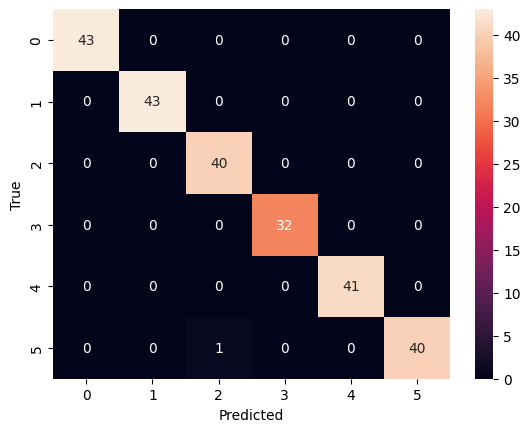

In [19]:
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)
y_test_classes= to_categorical(y_test, 6)
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
auc_score = roc_auc_score(y_test_classes, y_pred_classes, multi_class='ovr')
recall = recall_score(y_test_classes, y_pred_classes, average='micro')
f1 = f1_score(y_test_classes, y_pred_classes, average='micro')
precision = precision_score(y_test_classes, y_pred_classes, average='micro')
print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)
y_test_bin = np.argmax(y_test_classes, axis=1)
y_pred_bin = np.argmax(y_pred_classes, axis=1)
cm = confusion_matrix(y_test_bin, y_pred_bin)
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('conf.pdf')
plt.show()